# Árboles de Decision: Caso Practico


En este cas de uso practico se pretende resolver un problema de deteccion de Malware en dispositivos Android mediente el analisis del trafico de red que genera el dispositivo mediente el uso de Arboles de decisión.

## DataSet: Deteccion de Malawer en Android

The sophisticated and advanced Android malware is able to identify the presence of the emulator used by the malware analyst and in response, alter its behaviour to evade detection. To overcome this issue, we installed the Android applications on the real device and captured its network traffic. 

CICAAGM dataset is captured by installing the Android apps on the real smartphones semi-automated. The dataset is generated from 1,900 applications with the following three categories:
1. Adware (250 apps)

    Airpush: Designed to deliver unsolicited advertisements to the user’s systems for information stealing.

    Dowgin: Designed as an advertisement library that can also steal the user’s information.

    Kemoge: Designed to take over a user’s Android device. This adware is a hybrid of botnet and disguises itself as popular apps via repackaging.

    Mobidash: Designed to display ads and to compromise user’s personal information.

    Shuanet: Similar to Kemoge, Shuanet is also designed to take over a user’s device.

2. General Malware (150 apps)

    AVpass: Designed to be distributed in the guise of a Clock app.

    FakeAV: Designed as a scam that tricks user to purchase a full version of the software in order to re-mediate non-existing infections.

    FakeFlash/FakePlayer: Designed as a fake Flash app in order to direct users to a website (after successfully installed).

    GGtracker: Designed for SMS fraud (sends SMS messages to a premium-rate number) and information stealing.

    Penetho: Designed as a fake service (hacktool for Android devices that can be used to crack the WiFi password). The malware is also able to infect the user’s computer via infected email attachment, fake updates, external media and infected documents.

3. Benign (1,500 apps)

    2015 GooglePlay market (top free popular and top free new)

    2016 GooglePlay market (top free popular and top free new)

License

The CICAAGM dataset consists of the following items is publicly available for researchers.

    .pcap files – the network traffic of both the malware and benign (20% malware and 80% benign)

    .csv files - the list of extracted network traffic features generated by the CIC-flowmeter

If you are using our dataset, you should cite our related paper that outlines the details of the dataset and its underlying principles:

# Fuentes: 
Arash Habibi Lashkari, Andi Fitriah A. Kadir, Hugo Gonzalez, Kenneth Fon Mbah and Ali A. Ghorbani, “Towards a Network-Based Framework for Android Malware Detection and Characterization”, In the proceeding of the 15th International Conference on Privacy, Security and Trust, PST, Calgary, Canada, 2017.

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score
from pandas import DataFrame

## Fuciones auxiliares

In [2]:
# construccion de una funcion que realice el particionado completo.
def train_val_test_split(df, rstate = 42,shuffle = True, stratify=None):
    strat = df[stratify] if stratify else None 
    train_set, test_set = train_test_split(
        df, test_size = 0.4, random_state = rstate, shuffle=shuffle, stratify = strat)
    strat = train_test[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size= 0.5, random_state = rstate, shuffle = shuffle, stratify = strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return(X, y)

In [4]:
def evaluate_result(y_pred, y, y_prep_pred, y_prep, metric):
    print(metric.__name__, "WITHOT preparation:", metric(y_pred, y, average='weighted'))
    print(metric.__name__, "WITH preparation:", metric(y_prep_pred, y_prep, average='weighted'))

# 1.- Lectura del DataSet

In [5]:
df = pd.read_csv('Android/TotalFeatures-ISCXFlowMeter.csv')

In [6]:
df.head(5)

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,1020586,668,1641,35692,2276876,52,52,679,1390,53.431138,...,0.0,-1,0.0,2,4194240,1853440,1640,668,32,benign
1,80794,1,1,75,124,75,124,75,124,75.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
2,998,3,0,187,0,52,-1,83,-1,62.333333,...,0.0,-1,0.0,4,101888,-1,0,3,32,benign
3,189868,9,9,1448,6200,52,52,706,1390,160.888889,...,0.0,-1,0.0,2,4194240,2722560,8,9,32,benign
4,110577,4,6,528,1422,52,52,331,1005,132.000000,...,0.0,-1,0.0,2,155136,31232,5,4,32,benign


# 2.- Visualizacion de Dataset

In [7]:
df.head(10)

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
0,1020586,668,1641,35692,2276876,52,52,679,1390,53.431138,...,0.0,-1,0.0,2,4194240,1853440,1640,668,32,benign
1,80794,1,1,75,124,75,124,75,124,75.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
2,998,3,0,187,0,52,-1,83,-1,62.333333,...,0.0,-1,0.0,4,101888,-1,0,3,32,benign
3,189868,9,9,1448,6200,52,52,706,1390,160.888889,...,0.0,-1,0.0,2,4194240,2722560,8,9,32,benign
4,110577,4,6,528,1422,52,52,331,1005,132.000000,...,0.0,-1,0.0,2,155136,31232,5,4,32,benign
5,261876,7,6,1618,882,52,52,730,477,231.142857,...,0.0,-1,0.0,2,4194240,926720,3,7,32,benign
6,14,2,0,104,0,52,-1,52,-1,52.000000,...,0.0,-1,0.0,3,5824,-1,0,2,32,benign
7,29675,1,1,71,213,71,213,71,213,71.000000,...,0.0,-1,0.0,2,0,0,0,1,0,benign
8,806635,4,0,239,0,52,-1,83,-1,59.750000,...,0.0,-1,0.0,5,107008,-1,0,4,32,benign
9,56620,3,2,1074,719,52,52,592,667,358.000000,...,0.0,-1,0.0,3,128512,10816,1,3,32,benign


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631955 entries, 0 to 631954
Data columns (total 80 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration                 631955 non-null  int64  
 1   total_fpackets           631955 non-null  int64  
 2   total_bpackets           631955 non-null  int64  
 3   total_fpktl              631955 non-null  int64  
 4   total_bpktl              631955 non-null  int64  
 5   min_fpktl                631955 non-null  int64  
 6   min_bpktl                631955 non-null  int64  
 7   max_fpktl                631955 non-null  int64  
 8   max_bpktl                631955 non-null  int64  
 9   mean_fpktl               631955 non-null  float64
 10  mean_bpktl               631955 non-null  float64
 11  std_fpktl                631955 non-null  float64
 12  std_bpktl                631955 non-null  float64
 13  total_fiat               631955 non-null  int64  
 14  tota

In [9]:
df["calss"].value_counts() # en otro caso sera .value_counts(numeric = True)

calss
benign            471597
asware            155613
GeneralMalware      4745
Name: count, dtype: int64

### Buscando correlaciones

In [10]:
# Copiar el Dataset y transformar la variable de salida a numerica para calcular las correlaciones.
X = df.copy()
X ['calss'] = X['calss'].factorize()[0]

In [11]:
# Calcular las correlaciones
corr_matrix = X.corr()
corr_matrix["calss"].sort_values(ascending = False)

calss                     1.000000
flow_fin                  0.286175
min_seg_size_forward      0.258352
Init_Win_bytes_forward    0.129425
std_fpktl                 0.123758
                            ...   
furg_cnt                       NaN
burg_cnt                       NaN
flow_urg                       NaN
flow_cwr                       NaN
flow_ece                       NaN
Name: calss, Length: 80, dtype: float64

In [12]:
X.corr()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
duration,1.000000,0.004837,0.004011,0.001673,0.003518,-0.064100,-0.027231,0.008761,0.042925,-0.043746,...,0.998901,0.999458,0.047582,0.016532,0.027610,0.029712,0.003785,0.004838,0.082955,0.067066
total_fpackets,0.004837,1.000000,0.924622,0.425756,0.904007,-0.018958,0.005252,0.024685,0.086255,-0.007910,...,0.001614,0.002267,0.017229,0.016089,0.050201,0.059224,0.902713,0.999866,0.018198,0.018377
total_bpackets,0.004011,0.924622,1.000000,0.156780,0.997268,-0.017667,0.006912,0.018170,0.086886,-0.016104,...,0.000922,0.001617,0.016230,-0.000493,0.048190,0.058435,0.997580,0.924746,0.015124,0.019430
total_fpktl,0.001673,0.425756,0.156780,1.000000,0.090082,-0.003099,0.000803,0.021278,0.022088,0.022409,...,0.000335,0.000609,0.009896,0.001657,0.013283,0.015991,0.088422,0.425789,0.005477,0.000679
total_bpktl,0.003518,0.904007,0.997268,0.090082,1.000000,-0.014926,0.005966,0.012560,0.079905,-0.017328,...,0.000812,0.001452,0.014336,-0.000293,0.043571,0.053134,0.999616,0.904129,0.012139,0.019838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Init_Win_bytes_backward,0.029712,0.059224,0.058435,0.015991,0.053134,-0.268444,0.038319,0.429893,0.593143,-0.030004,...,0.026959,0.029512,0.097316,-0.052507,0.811204,1.000000,0.056761,0.059242,0.333701,0.069405
RRT_samples_clnt,0.003785,0.902713,0.997580,0.088422,0.999616,-0.016659,0.006156,0.015727,0.084280,-0.017595,...,0.000893,0.001560,0.015200,-0.000437,0.046784,0.056761,1.000000,0.902834,0.014299,0.019679
Act_data_pkt_forward,0.004838,0.999866,0.924746,0.425789,0.904129,-0.018947,0.005264,0.024705,0.086278,-0.007893,...,0.001617,0.002269,0.017233,0.000734,0.050220,0.059242,0.902834,1.000000,0.018229,0.018391
min_seg_size_forward,0.082955,0.018198,0.015124,0.005477,0.012139,-0.686154,-0.189824,-0.074763,0.217989,-0.524024,...,0.077943,0.079324,0.048803,0.052177,0.394743,0.333701,0.014299,0.018229,1.000000,0.258352


In [13]:
# Se puede llegar a valorar y quedarnos con aquellas que tiene mayor correlacion
corr_matrix[corr_matrix["calss"] > 0.05]

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward,calss
duration,1.000000,0.004837,0.004011,0.001673,0.003518,-0.064100,-0.027231,0.008761,0.042925,-0.043746,...,0.998901,0.999458,0.047582,0.016532,0.027610,0.029712,0.003785,0.004838,0.082955,0.067066
max_bpktl,0.042925,0.086255,0.086886,0.022088,0.079905,-0.277317,0.275923,0.492194,1.000000,-0.018358,...,0.035413,0.038732,0.127548,-0.044916,0.586742,0.593143,0.084280,0.086278,0.217989,0.073212
mean_bpktl,0.025117,0.139142,0.151761,0.018954,0.146437,-0.280648,0.465208,0.342392,0.895712,-0.096195,...,0.018533,0.021519,0.114949,-0.045442,0.452735,0.478823,0.150252,0.139172,0.122226,0.064753
std_fpktl,0.039350,0.010172,0.002331,0.011416,-0.003162,-0.245792,0.052877,0.817873,0.564243,0.259588,...,0.031418,0.033978,0.096844,-0.020885,0.558249,0.532900,0.000140,0.010182,0.301237,0.123758
std_bpktl,0.048743,0.020324,0.014005,0.007763,0.007768,-0.225143,0.035371,0.534532,0.941626,0.051756,...,0.042562,0.045450,0.113854,-0.033991,0.594790,0.577954,0.012050,0.020335,0.276055,0.072953
total_fiat,0.943898,0.002190,0.001718,0.000708,0.001546,-0.049879,-0.031218,-0.029233,-0.005961,-0.048869,...,0.943668,0.943339,0.015254,0.020302,-0.011637,-0.016421,0.001615,0.002190,0.065124,0.064770
min_fiat,0.841692,-0.001975,-0.002172,-0.000746,-0.001820,-0.040046,-0.036619,-0.052289,-0.035963,-0.053811,...,0.843330,0.842512,-0.005389,0.015316,-0.027350,-0.033944,-0.002037,-0.001974,0.051853,0.074491
max_fiat,0.943438,-0.000420,-0.000714,-0.000389,-0.000548,-0.046977,-0.032630,-0.032606,-0.009878,-0.049032,...,0.944412,0.943971,0.012557,0.017756,-0.012317,-0.016206,-0.000644,-0.000418,0.061285,0.064875
mean_fiat,0.918036,-0.001970,-0.002241,-0.000728,-0.001907,-0.042455,-0.036056,-0.048712,-0.032412,-0.052892,...,0.919653,0.918797,-0.003523,0.016958,-0.025823,-0.032466,-0.002113,-0.001968,0.055151,0.071397
std_flowpktl,0.036942,0.087741,0.087307,0.024298,0.080666,-0.262968,0.338513,0.631466,0.911584,0.095976,...,0.030013,0.033100,0.120257,-0.035737,0.580266,0.586355,0.084725,0.087764,0.219346,0.119375


# 3.- Division del DataSet

In [14]:
# Divison del DataSet
train_set, val_set, test_set = train_val_test_split(X)

In [15]:
X_train, y_train = remove_labels(train_set, 'calss')
X_val, y_val = remove_labels(val_set, 'calss')
X_test, y_test = remove_labels(test_set, 'calss')

# 4.- Escalado del DataSet


Es importante comprender que los arbolesd e desicion son algoritmos que **no requieren demaciada prepaacion de los datos** concretamente, no requieren realizar escalado y normalizacion.En este ejercicio se realiza el escalado al DatSet y se comparan los resultados con el DataSet sin escalar.
Des esta manera se demuestra como aplicar preprocesamientos como el escalado puede afectar el rendimiento del problema o del modelo.

In [16]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [17]:
scaler = RobustScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
scaler = RobustScaler()
X_val_scaled = scaler.fit_transform(X_val)

In [19]:
# Realizar la transformacion a un DataFrame de pandas 
X_train_scaled = DataFrame(X_train_scaled, columns = X_train.columns, index=X_train.index)
X_train_scaled.head(10)

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,min_idle,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward
508881,-0.013646,0.0,1.0,-0.310056,1.556886,0.375000,4.924528,-0.027100,2.250000,-0.032895,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000011,0.0,0.0,-1.0
208326,-0.013926,0.0,0.0,0.664804,0.000000,6.607143,0.000000,0.918699,0.000000,1.115132,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000000,0.0,0.0,-1.0
107213,-0.013926,0.0,0.0,0.703911,0.000000,6.857143,0.000000,0.956640,0.000000,1.161184,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000000,0.0,0.0,-1.0
466726,-0.000273,0.0,1.0,-0.363128,2.724551,0.035714,8.603774,-0.078591,3.931034,-0.095395,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000011,0.0,0.0,-1.0
230085,-0.013926,0.0,0.0,0.664804,0.000000,6.607143,0.000000,0.918699,0.000000,1.115132,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000000,0.0,0.0,-1.0
472961,34.421927,1.5,4.0,1.558659,3.868263,0.000000,1.000000,1.341463,4.163793,0.337171,...,59.657102,48.116772,47.580946,0.0,0.0,13.421042,12.657580,3.0,1.5,0.0
482372,-0.013805,0.5,0.0,-0.136872,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050987,...,0.000000,0.000000,0.000000,0.0,1.0,-0.080736,0.000000,0.0,0.5,0.0
619993,17.578734,0.5,0.0,-0.050279,0.000000,0.553571,0.000000,0.000000,0.000000,0.000000,...,30.549478,24.617883,24.365465,0.0,1.0,0.063376,0.000000,0.0,0.5,0.0
65344,-0.013926,0.0,0.0,0.703911,0.000000,6.857143,0.000000,0.956640,0.000000,1.161184,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000000,0.0,0.0,-1.0
46666,-0.013926,0.0,0.0,0.505587,0.000000,5.589286,0.000000,0.764228,0.000000,0.927632,...,0.000000,0.000000,0.000000,0.0,0.0,-0.286342,0.000000,0.0,0.0,-1.0


In [20]:
X_train_scaled.describe()

,duration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,...,min_idle,mean_idle,max_idle,std_idle,FFNEPD,Init_Win_bytes_forward,Init_Win_bytes_backward,RRT_samples_clnt,Act_data_pkt_forward,min_seg_size_forward
count,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,...,379173.000000,379173.000000,379173.000000,3.791730e+05,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000,379173.000000
mean,12.543409,2.927643,10.762678,1.947184,75.104138,1.600682,0.855241,0.491724,1.591823,0.303639,...,19.838596,16.279309,16.441899,4.686618e+05,0.362658,2.861506,3.435883,10.087709,2.924548,-0.376798
std,116.165117,92.319402,370.875546,185.549801,3071.968461,2.817301,1.676098,0.786500,3.210186,0.533388,...,201.477623,162.562856,160.822696,6.188642e+06,3.836035,5.577212,7.354164,369.660712,92.301146,0.466297
min,-0.013936,-0.500000,0.000000,-0.513966,0.000000,-0.946429,0.000000,-0.227642,0.000000,-0.273026,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.286345,0.000000,0.000000,-0.500000,-1.000000
25%,-0.013926,0.000000,0.000000,-0.321229,0.000000,0.000000,0.000000,-0.084011,0.000000,-0.101974,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.286342,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.986074,1.000000,1.000000,0.678771,1.000000,1.000000,1.000000,0.915989,1.000000,0.898026,...,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.713658,1.000000,1.000000,1.000000,0.000000
max,25277.128872,24127.000000,74768.000000,113118.041899,622288.473054,23.892857,26.245283,3.840108,11.991379,4.299342,...,43893.471528,35408.189283,35008.286082,5.670000e+08,2267.000000,13.421042,46.346741,74524.000000,24127.000000,0.375000


# 5.- Arbol de desicion

In [21]:
from sklearn.tree import DecisionTreeClassifier
MAX_DEPTH = 20

#Modelo entrenado con el dataset Escalar 
clf_tree_scaled = DecisionTreeClassifier(max_depth = MAX_DEPTH, random_state = 42)
clf_tree_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

Comenzar prediciendo con el propio DataSet con el que se a entrenado el algoritmo (train_set), suele ser interesante para comprobar  si se esta produciendo overfiting

In [22]:
# Modelo NO escalado 
clf_tree = DecisionTreeClassifier(max_depth = MAX_DEPTH, random_state = 42)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [23]:
# predecir con el dataSet de entrenamiento 
y_train_pred = clf_tree.predict(X_train)
y_train_prep_pred = clf_tree_scaled.predict(X_train_scaled)

In [24]:
#Comprobar los resultados entre el esclado y sin escalar 
evaluate_result(y_train_pred, y_train, y_train_prep_pred, y_train, f1_score)

f1_score WITHOT preparation: 0.9593915432471419
f1_score WITH preparation: 0.9593876451031004


# 6.- Visualizando el limite de  desicion

In [25]:
# se reduce el numero de atributos del DataSet para visualizarlo mejor 

X_train_reduced = X_train[['min_flowpktl', 'flow_fin']]

In [26]:
# SE genera un modelo con el DataSet reducido.
clf_tree_reduced = DecisionTreeClassifier(max_depth=2, random_state =42)
clf_tree_reduced.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

/home/paty/anaconda3/envs/Programacion-logica/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


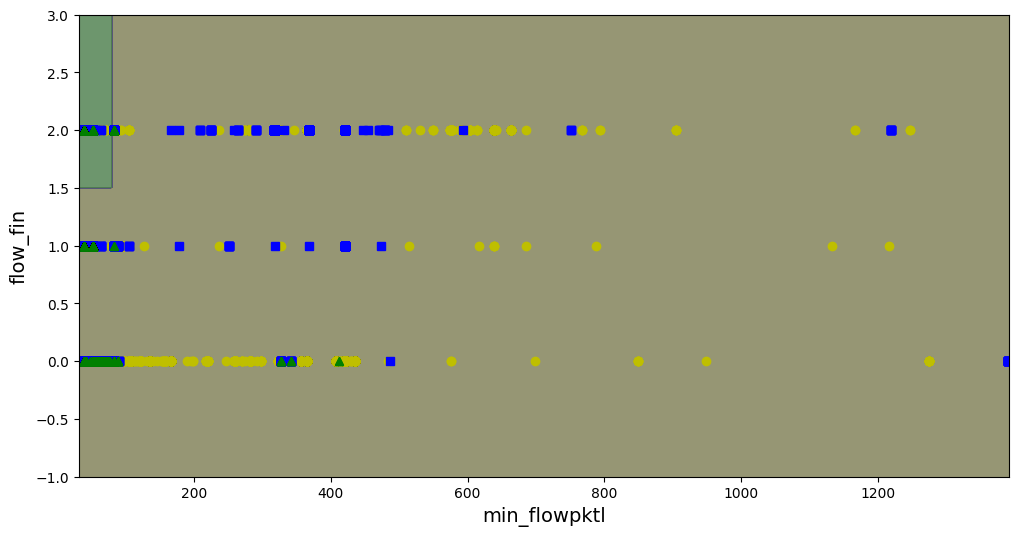

In [27]:
#repreentar graficamente el mimie de desicion contruido
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_boundary(clf, X, y, plot_training = True, resolution = 1000):
    mins = X.min (axis = 0)- 1
    maxs = X.max(axis = 0) + 1
    x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
    plt.contourf(x1, x2, y_pred, cmap= custom_cmap2, alpha= 0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="normal")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="adware")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="malware")
        plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
        plt.xlabel('min_flowpktl', fontsize = 14)
        plt.ylabel('flow_fin', fontsize = 14, rotation = 90)

plt.figure(figsize = (12,6))
plot_decision_boundary(clf_tree_reduced, X_train_reduced.values, y_train)
plt.show()

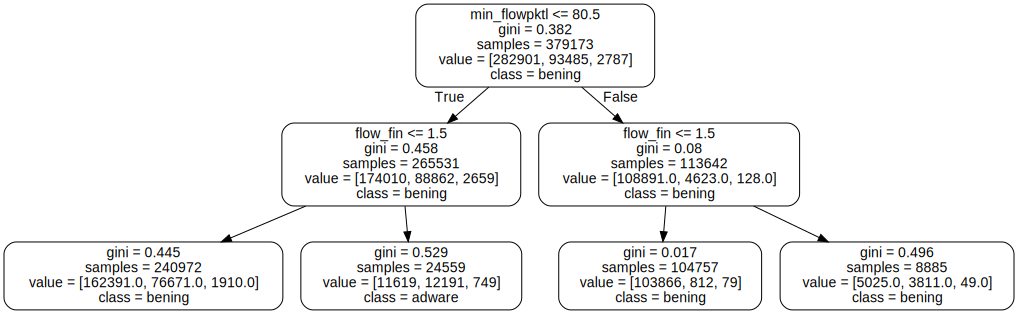

In [28]:
# Pintar el arbol para compararlo con la reprecentacion grafica anterior 
from graphviz import Source
from sklearn.tree import export_graphviz
import os
export_graphviz(
    clf_tree_reduced,
    out_file = "android_malware.dot",
    feature_names = X_train_reduced.columns,
    class_names = ["bening", "adware","malware"],
    rounded = True
)
Source.from_file("android_malware.dot")